<a href="https://colab.research.google.com/github/ayush-kumar-rai/A.N.D.-Intern/blob/used-car-price-prediction/used_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
# Load the dataset
df = pd.read_csv('/content/used_car_dataset.csv')
df.describe().T.style.background_gradient(cmap = "viridis")
df1 = df.copy()
df1['car_name'] = df['car_name'].apply(lambda x : x.split(' ')[0])
df1.drop(['city'],axis=1, inplace=True)





In [124]:
#coverting the values in standard fromat
def convert(x):
      if ',' in x:
        s =  x.split(' ')[1].split(',')
        return float(s[0] + s[1])
      else:
        value = float(x.split(' ')[1])
        return value * 100000

df2 = df1.copy()
df2['car_price_in_rupees'] = df['car_price_in_rupees'].apply(convert)
df2.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture
0,Hyundai,445000.0,"22,402",Petrol,2016
1,Maruti,293000.0,"10,344",Petrol,2019
2,Tata,2249000.0,"12,999",Diesel,2021
3,Maruti,695000.0,"45,000",Petrol,2016
4,Jeep,1200000.0,"11,193",Petrol,2019


In [125]:
df3 = df2.copy()
df3['kms_driven'] = df2['kms_driven'].apply(lambda x : x.split(' ')[0])
df3.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture
0,Hyundai,445000.0,"22,402",Petrol,2016
1,Maruti,293000.0,"10,344",Petrol,2019
2,Tata,2249000.0,"12,999",Diesel,2021
3,Maruti,695000.0,"45,000",Petrol,2016
4,Jeep,1200000.0,"11,193",Petrol,2019


In [126]:
df4 = df3.copy()
df4['kms_driven'] = df3['kms_driven'][df3['kms_driven'].str.len() > 4]
def removeComma(x):
    if ',' in x :
        s = x.split(',')
        return float(s[0] + s[1])
df4 = df3.copy()
df4.kms_driven = df4.kms_driven.dropna()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2105 non-null   object 
 1   car_price_in_rupees  2105 non-null   float64
 2   kms_driven           2105 non-null   object 
 3   fuel_type            2105 non-null   object 
 4   year_of_manufacture  2105 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 82.4+ KB


In [127]:
df5 = df4.copy()
df5['kms_driven'] = df4['kms_driven'].apply(removeComma)
df5.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture
0,Hyundai,445000.0,22402.0,Petrol,2016
1,Maruti,293000.0,10344.0,Petrol,2019
2,Tata,2249000.0,12999.0,Diesel,2021
3,Maruti,695000.0,45000.0,Petrol,2016
4,Jeep,1200000.0,11193.0,Petrol,2019


In [128]:
#Filtering
filtered_df = df5[df5['car_name'].apply(lambda x: df5['car_name'].value_counts().get(x, 0) > 20)]
filtered_df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture
0,Hyundai,445000.0,22402.0,Petrol,2016
1,Maruti,293000.0,10344.0,Petrol,2019
2,Tata,2249000.0,12999.0,Diesel,2021
3,Maruti,695000.0,45000.0,Petrol,2016
4,Jeep,1200000.0,11193.0,Petrol,2019


In [129]:
df_6 = filtered_df[filtered_df.car_price_in_rupees > 100000]
df_6.describe()

,car_price_in_rupees,kms_driven,year_of_manufacture
count,2.009000e+03,2001.00000,2009.000000
mean,1.050281e+06,41454.52024,2017.052265
std,1.088725e+06,23882.72005,2.798647
min,1.100000e+05,100.00000,2004.000000
25%,4.750000e+05,22498.00000,2015.000000
50%,6.900000e+05,40547.00000,2017.000000
75%,1.105000e+06,58549.00000,2019.000000
max,9.500000e+06,99941.00000,2022.000000


In [130]:
df7 = df_6[df_6.kms_driven > 1000]
df7.describe()

,car_price_in_rupees,kms_driven,year_of_manufacture
count,1.924000e+03,1924.000000,1924.000000
mean,1.046510e+06,43108.163202,2017.159563
std,1.086915e+06,22850.029828,2.693573
min,1.100000e+05,1064.000000,2006.000000
25%,4.750000e+05,24537.500000,2015.000000
50%,6.900000e+05,41442.000000,2017.000000
75%,1.093500e+06,59729.500000,2019.000000
max,9.500000e+06,99941.000000,2022.000000


In [131]:
df8 = df7[df7['fuel_type'].apply(lambda x: df7['fuel_type'].value_counts().get(x, 0) > 500)]
df8.fuel_type.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [132]:
dummies = pd.get_dummies(df8.car_name)
df9 = pd.concat([df8, dummies],axis=1)
dummies_2 = pd.get_dummies(df9.fuel_type)
df10 = pd.concat([df9, dummies_2],axis=1)
df10.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture,Audi,BMW,Ford,Honda,Hyundai,...,Mahindra,Maruti,Mercedes-Benz,Renault,Skoda,Tata,Toyota,Volkswagen,Diesel,Petrol
0,Hyundai,445000.0,22402.0,Petrol,2016,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,Maruti,293000.0,10344.0,Petrol,2019,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,Tata,2249000.0,12999.0,Diesel,2021,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,Maruti,695000.0,45000.0,Petrol,2016,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,Jeep,1200000.0,11193.0,Petrol,2019,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [133]:
price_ranges = [0, 500000, 1000000, 1500000, np.inf]
price_labels = ['Low', 'Medium', 'High', 'Very High']
df10['price_category'] = pd.cut(df10['car_price_in_rupees'], bins=price_ranges, labels=price_labels)
df10.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,year_of_manufacture,Audi,BMW,Ford,Honda,Hyundai,...,Maruti,Mercedes-Benz,Renault,Skoda,Tata,Toyota,Volkswagen,Diesel,Petrol,price_category
0,Hyundai,445000.0,22402.0,Petrol,2016,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,Low
1,Maruti,293000.0,10344.0,Petrol,2019,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,Low
2,Tata,2249000.0,12999.0,Diesel,2021,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,Very High
3,Maruti,695000.0,45000.0,Petrol,2016,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,Medium
4,Jeep,1200000.0,11193.0,Petrol,2019,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,High


In [134]:
X = df10.drop('price_category', axis=1)
X = pd.get_dummies(X, columns=['car_name', 'fuel_type'], drop_first=True)  # One-hot encoding
y = df10['price_category']
X.head()

,car_price_in_rupees,kms_driven,year_of_manufacture,Audi,BMW,Ford,Honda,Hyundai,Jeep,Kia,...,car_name_MG,car_name_Mahindra,car_name_Maruti,car_name_Mercedes-Benz,car_name_Renault,car_name_Skoda,car_name_Tata,car_name_Toyota,car_name_Volkswagen,fuel_type_Petrol
0,445000.0,22402.0,2016,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,293000.0,10344.0,2019,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2249000.0,12999.0,2021,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,695000.0,45000.0,2016,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1200000.0,11193.0,2019,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [135]:
# Check for missing values
print(df.isnull().sum())



car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64


In [136]:
# Drop rows with missing values
df = df.dropna()



In [137]:
# Check for duplicates
print(df.duplicated().sum())



92


In [138]:
# Drop duplicates
df = df.drop_duplicates()



In [139]:
# Check for outliers in the 'car_price_in_rupees' column
print(df['car_price_in_rupees'].describe())



count            2013
unique            811
top       ₹ 4.75 Lakh
freq               23
Name: car_price_in_rupees, dtype: object


In [140]:
# Data preprocessing
df = df.dropna()  # Remove rows with missing values
df['year_of_manufacture'] = df['year_of_manufacture'].astype('int')

# Feature engineering
df['year_of_manufacture'] = 2024 - df['year_of_manufacture']

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder
df['city'] = LabelEncoder().fit_transform(df['city'])
df['Fuel Type'] = LabelEncoder().fit_transform(df['fuel_type'])

In [141]:
# Data scaling
from sklearn.preprocessing import StandardScaler

# Remove commas from 'kms_driven' column and convert to float
df['kms_driven'] = df['kms_driven'].str.replace(',', '').astype(float)

scaler = StandardScaler()
df[['year_of_manufacture', 'kms_driven']] = scaler.fit_transform(df[['year_of_manufacture', 'kms_driven']])

In [142]:
# Feature selection
features = ['year_of_manufacture', 'kms_driven', 'fuel_type', 'city']
target = 'car_price_in_rupees'



In [143]:
# Data splitting
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [144]:

from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le = LabelEncoder()
X_train['fuel_type'] = le.fit_transform(X_train['fuel_type'])


In [145]:
# Processing target variable
y_train = y_train.str.replace(r'\D', '').astype(float)

<ipython-input-145-73708078d89d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  y_train = y_train.str.replace(r'\D', '').astype(float)


In [146]:
# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [147]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# convert string features to numerical values using label encoding
le = LabelEncoder()
X_test['fuel_type'] = le.fit_transform(X_test['fuel_type'])

# convert string values to numerical values using string manipulation
y_test = y_test.str.replace(r'\D', '').astype(float)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 9634257.088418206
R-squared: -0.018421789729811344


<ipython-input-147-5c8772c819d0>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  y_test = y_test.str.replace(r'\D', '').astype(float)


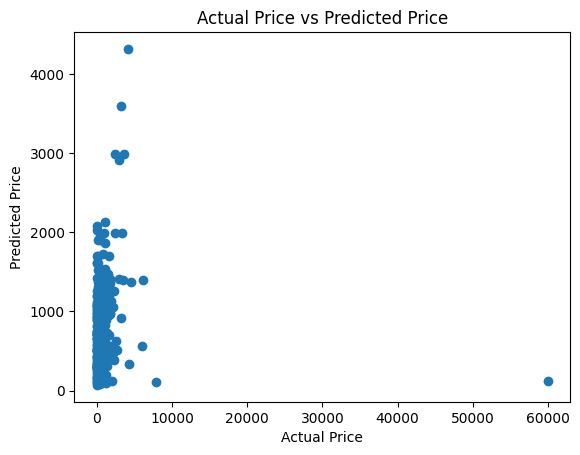

In [148]:

# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()
